In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

%matplotlib notebook

In [2]:
results = pd.concat([
    pd.read_csv(report_path)
    for report_path in glob('../results/report_*.csv')
]).reset_index()

results.head()

,index,experiment,epoch,configuration,val_accuracy,train_accuracy
0,0,configuration_3x3_5x5,1,"conv3x3,conv5x5",0.4674,0.476017
1,1,configuration_3x3_5x5,2,"conv3x3,conv5x5",0.4415,0.443867
2,2,configuration_3x3_5x5,3,"conv3x3,conv5x5",0.4859,0.483050
3,3,configuration_3x3_5x5,4,"conv3x3,conv5x5",0.6407,0.636167
4,4,configuration_3x3_5x5,5,"conv3x3,conv5x5",0.6511,0.649383


In [3]:
run_results = results.groupby(['experiment', 'configuration'])
run_results.groups.keys()

dict_keys([('configuration_3x3_3x3', 'conv3x3,conv3x3'), ('configuration_3x3_5x5', 'conv3x3,conv5x5'), ('configuration_5x5_3x3', 'conv5x5,conv3x3'), ('configuration_5x5_5x5', 'conv5x5,conv5x5'), ('random_configuration_rerun', 'conv3x3,conv3x3'), ('random_configuration_rerun', 'conv3x3,conv5x5'), ('random_configuration_rerun', 'conv5x5,conv3x3'), ('random_configuration_rerun', 'conv5x5,conv5x5')])

In [4]:
run_results.describe()

index                          \
                                            count   mean         std  min   
experiment                 configuration                                    
configuration_3x3_3x3      conv3x3,conv3x3  300.0  149.5   86.746758  0.0   
configuration_3x3_5x5      conv3x3,conv5x5  300.0  149.5   86.746758  0.0   
configuration_5x5_3x3      conv5x5,conv3x3  300.0  149.5   86.746758  0.0   
configuration_5x5_5x5      conv5x5,conv5x5  300.0  149.5   86.746758  0.0   
random_configuration_rerun conv3x3,conv3x3  354.0  708.0  409.340934  2.0   
                           conv3x3,conv5x5  354.0  709.0  409.340934  3.0   
                           conv5x5,conv3x3  355.0  708.0  410.495635  0.0   
                           conv5x5,conv5x5  355.0  709.0  410.495635  1.0   

                                                                            \
                                               25%    50%      75%     max   
experiment                 configuration                                     
configuration_3x3_3x3      conv3x3,conv3x3   74.75  149.5   224.25   299.0   
configuration_3x3_5x5      conv3x3,conv5x5   74.75  149.5   224.25   299.0   
configuration_5x5_3x3      conv5x5,conv3x3   74.75  149.5   224.25   299.0   
configuration_5x5_5x5      conv5x5,conv5x5   74.75  149.5   224.25   299.0   
random_configuration_rerun conv3x3,conv3x3  355.00  708.0  1061.00  1414.0   
                           conv3x3,conv5x5  356.00  709.0  1062.00  1415.0   
                           conv5x5,conv3x3  354.00  708.0  1062.00  1416.0   
                           conv5x5,conv5x5  355.00  709.0  1063.00  1417.0   

                                            epoch         ... val_accuracy  \
                                            count   mean  ...          75%   
experiment                 configuration                  ...                
configuration_3x3_3x3      conv3x3,conv3x3  300.0  150.5  ...     0.986900   
configuration_3x3_5x5      conv3x3,conv5x5  300.0  150.5  ...     0.988400   
configuration_5x5_3x3      conv5x5,conv3x3  300.0  150.5  ...     0.988100   
configuration_5x5_5x5      conv5x5,conv5x5  300.0  150.5  ...     0.989000   
random_configuration_rerun conv3x3,conv3x3  354.0  177.5  ...     0.983975   
                           conv3x3,conv5x5  354.0  177.5  ...     0.986400   
                           conv5x5,conv3x3  355.0  178.0  ...     0.985200   
                           conv5x5,conv5x5  355.0  178.0  ...     0.986300   

                                                   train_accuracy            \
                                               max          count      mean   
experiment                 configuration                                      
configuration_3x3_3x3      conv3x3,conv3x3  0.9885          300.0  0.972557   
configuration_3x3_5x5      conv3x3,conv5x5  0.9894          300.0  0.968169   
configuration_5x5_3x3      conv5x5,conv3x3  0.9893          300.0  0.975387   
configuration_5x5_5x5      conv5x5,conv5x5  0.9896          300.0  0.961456   
random_configuration_rerun conv3x3,conv3x3  0.9877          354.0  0.910910   
                           conv3x3,conv5x5  0.9881          354.0  0.911070   
                           conv5x5,conv3x3  0.9890          355.0  0.913204   
                           conv5x5,conv5x5  0.9887          355.0  0.913180   

                                                                          \
                                                 std       min       25%   
experiment                 configuration                                   
configuration_3x3_3x3      conv3x3,conv3x3  0.072591  0.349900  0.982579   
configuration_3x3_5x5      conv3x3,conv5x5  0.074625  0.443867  0.980658   
configuration_5x5_3x3      conv5x5,conv3x3  0.062498  0.460283  0.983996   
configuration_5x5_5x5      conv5x5,conv5x5  0.075101  0.385017  0.980912   
random_configuration_rerun conv3x3,conv3x3  0.103107  0.260367  0.877975   


In [5]:
top_validation_scores = results.loc[run_results['val_accuracy'].idxmax()]
top_validation_scores

,index,experiment,epoch,configuration,val_accuracy,train_accuracy
2317,299,configuration_3x3_3x3,300,"conv3x3,conv3x3",0.9885,0.995450
286,286,configuration_3x3_5x5,287,"conv3x3,conv5x5",0.9894,0.995367
2573,255,configuration_5x5_3x3,256,"conv5x5,conv3x3",0.9893,0.995083
1967,249,configuration_5x5_5x5,250,"conv5x5,conv5x5",0.9896,0.994800
1666,1366,random_configuration_rerun,342,"conv3x3,conv3x3",0.9877,0.990083
1691,1391,random_configuration_rerun,348,"conv3x3,conv5x5",0.9881,0.991200
1696,1396,random_configuration_rerun,350,"conv5x5,conv3x3",0.9890,0.991100
1673,1373,random_configuration_rerun,344,"conv5x5,conv5x5",0.9887,0.991867


In [6]:
def plot_training_curves(results, ncols=2, figsize=(16, 16), from_epoch=None):
        
    runs = [(k, v) for k, v in results.groupby(['experiment', 'configuration']).groups.items()]
    nrows = len(runs) // ncols + (0 if len(runs) % ncols == 0 else 1)
    
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    
    for i, row in enumerate(axes):
        for j, ax in enumerate(row):
            key, data_indices = runs[i*ncols+j]
            experiment_name = '_'.join(key)
            ax.set_title(experiment_name)
            run_data = results.loc[data_indices]
            if from_epoch is not None:
                run_data = run_data[run_data['epoch'] >= from_epoch]

            run_data.plot(ax=ax, x='epoch', y='train_accuracy')
            run_data.plot(ax=ax, x='epoch', y='val_accuracy')

<IPython.core.display.Javascript object>


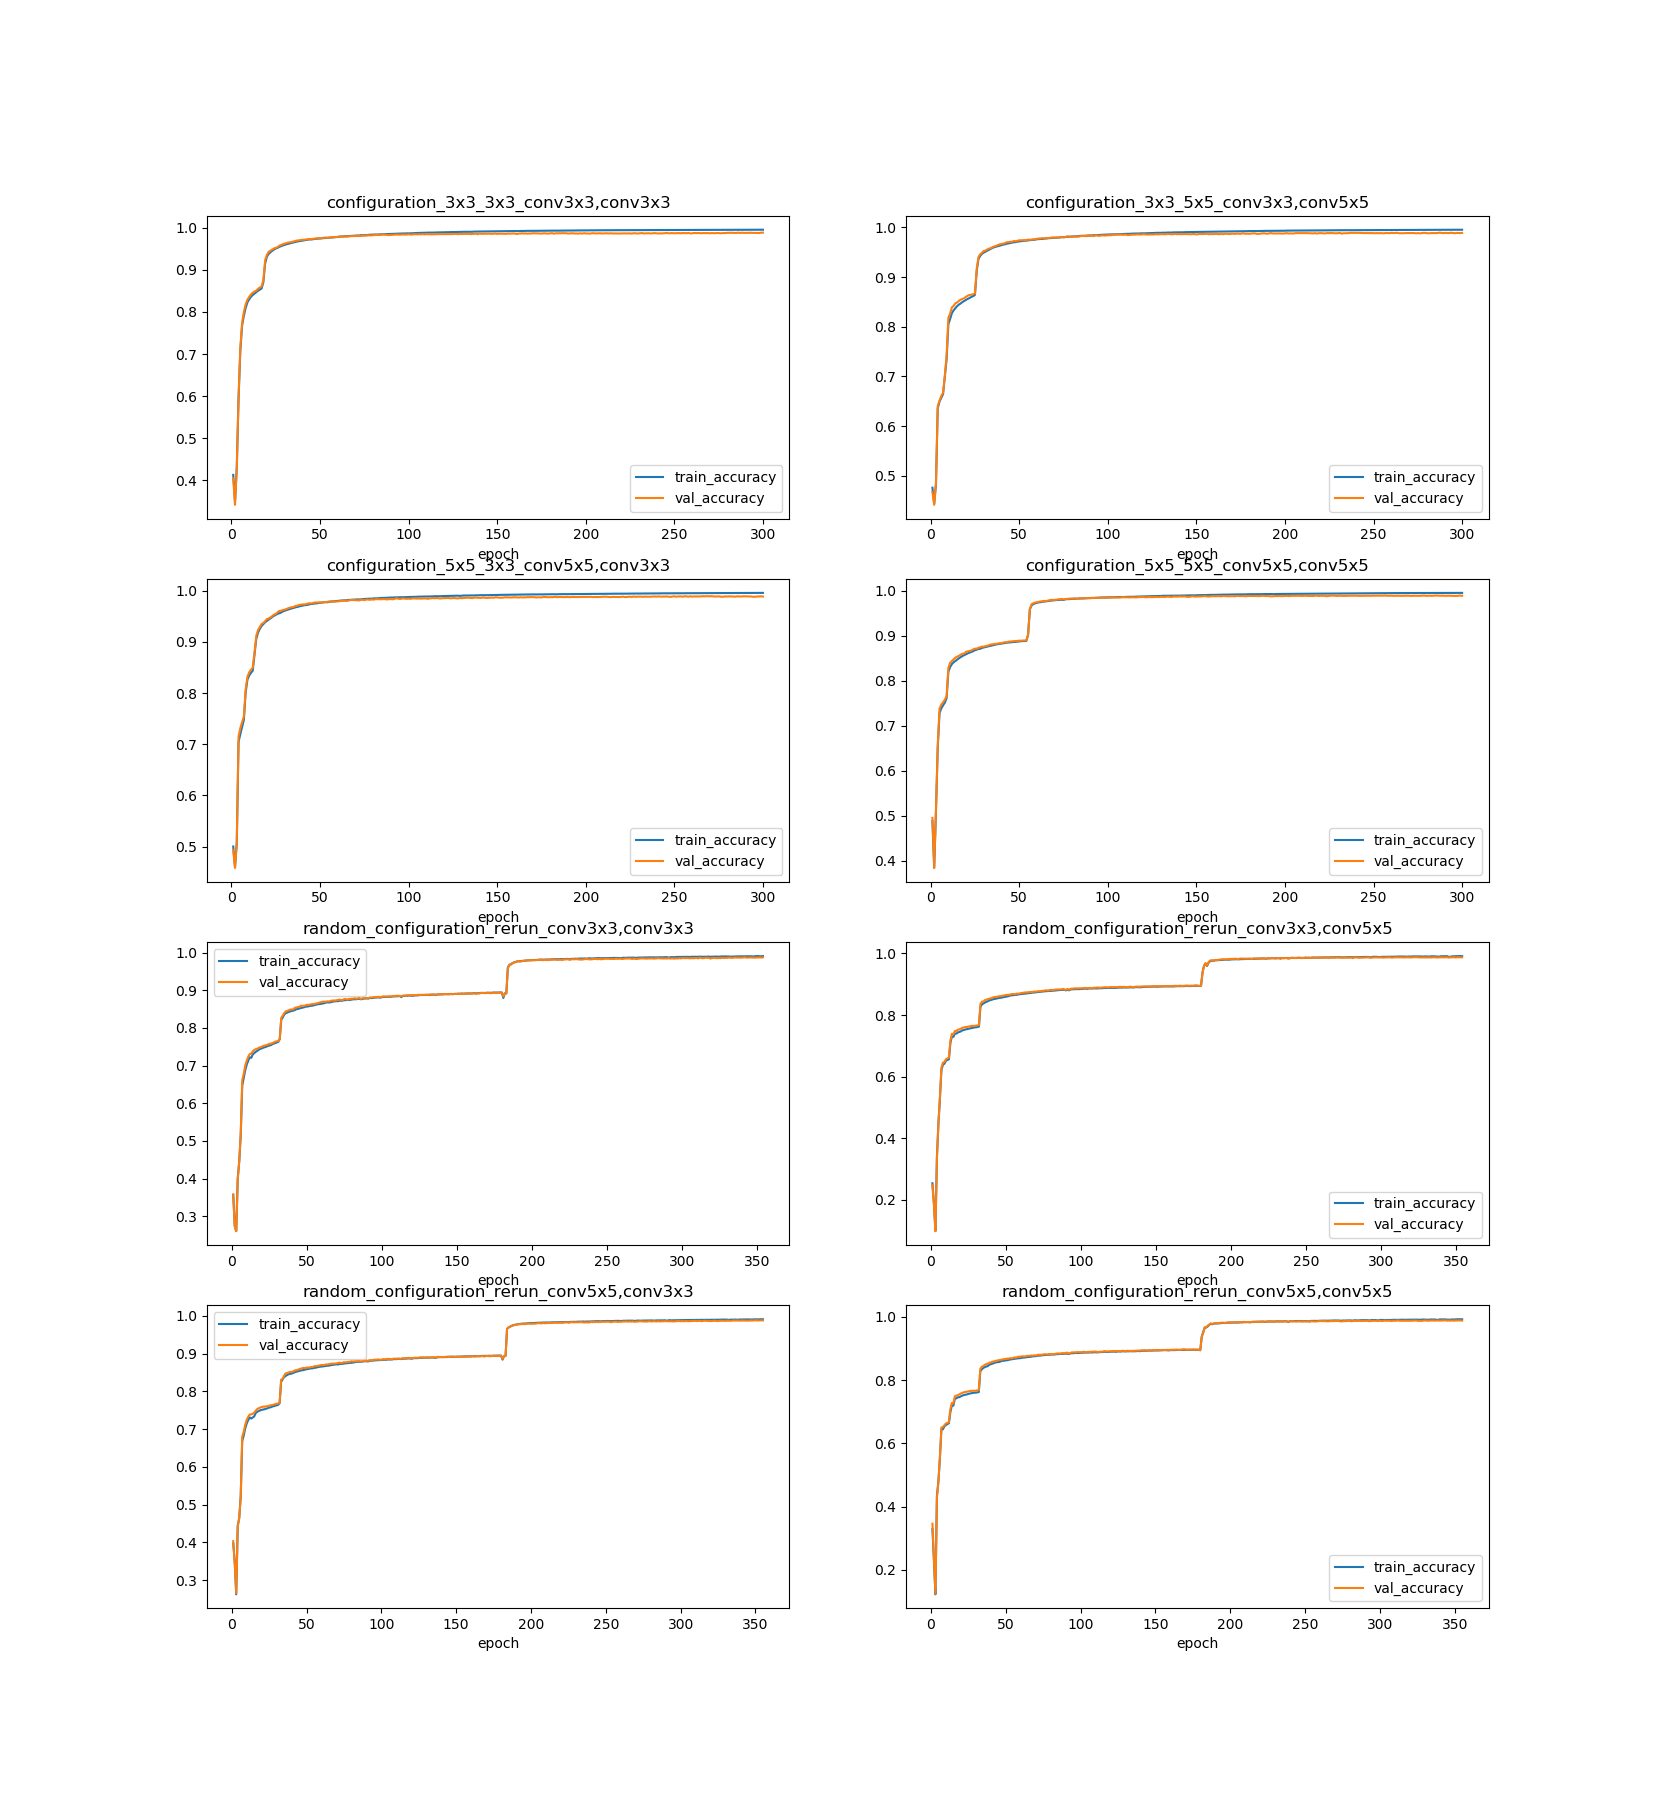

In [7]:
plot_training_curves(results)

<IPython.core.display.Javascript object>


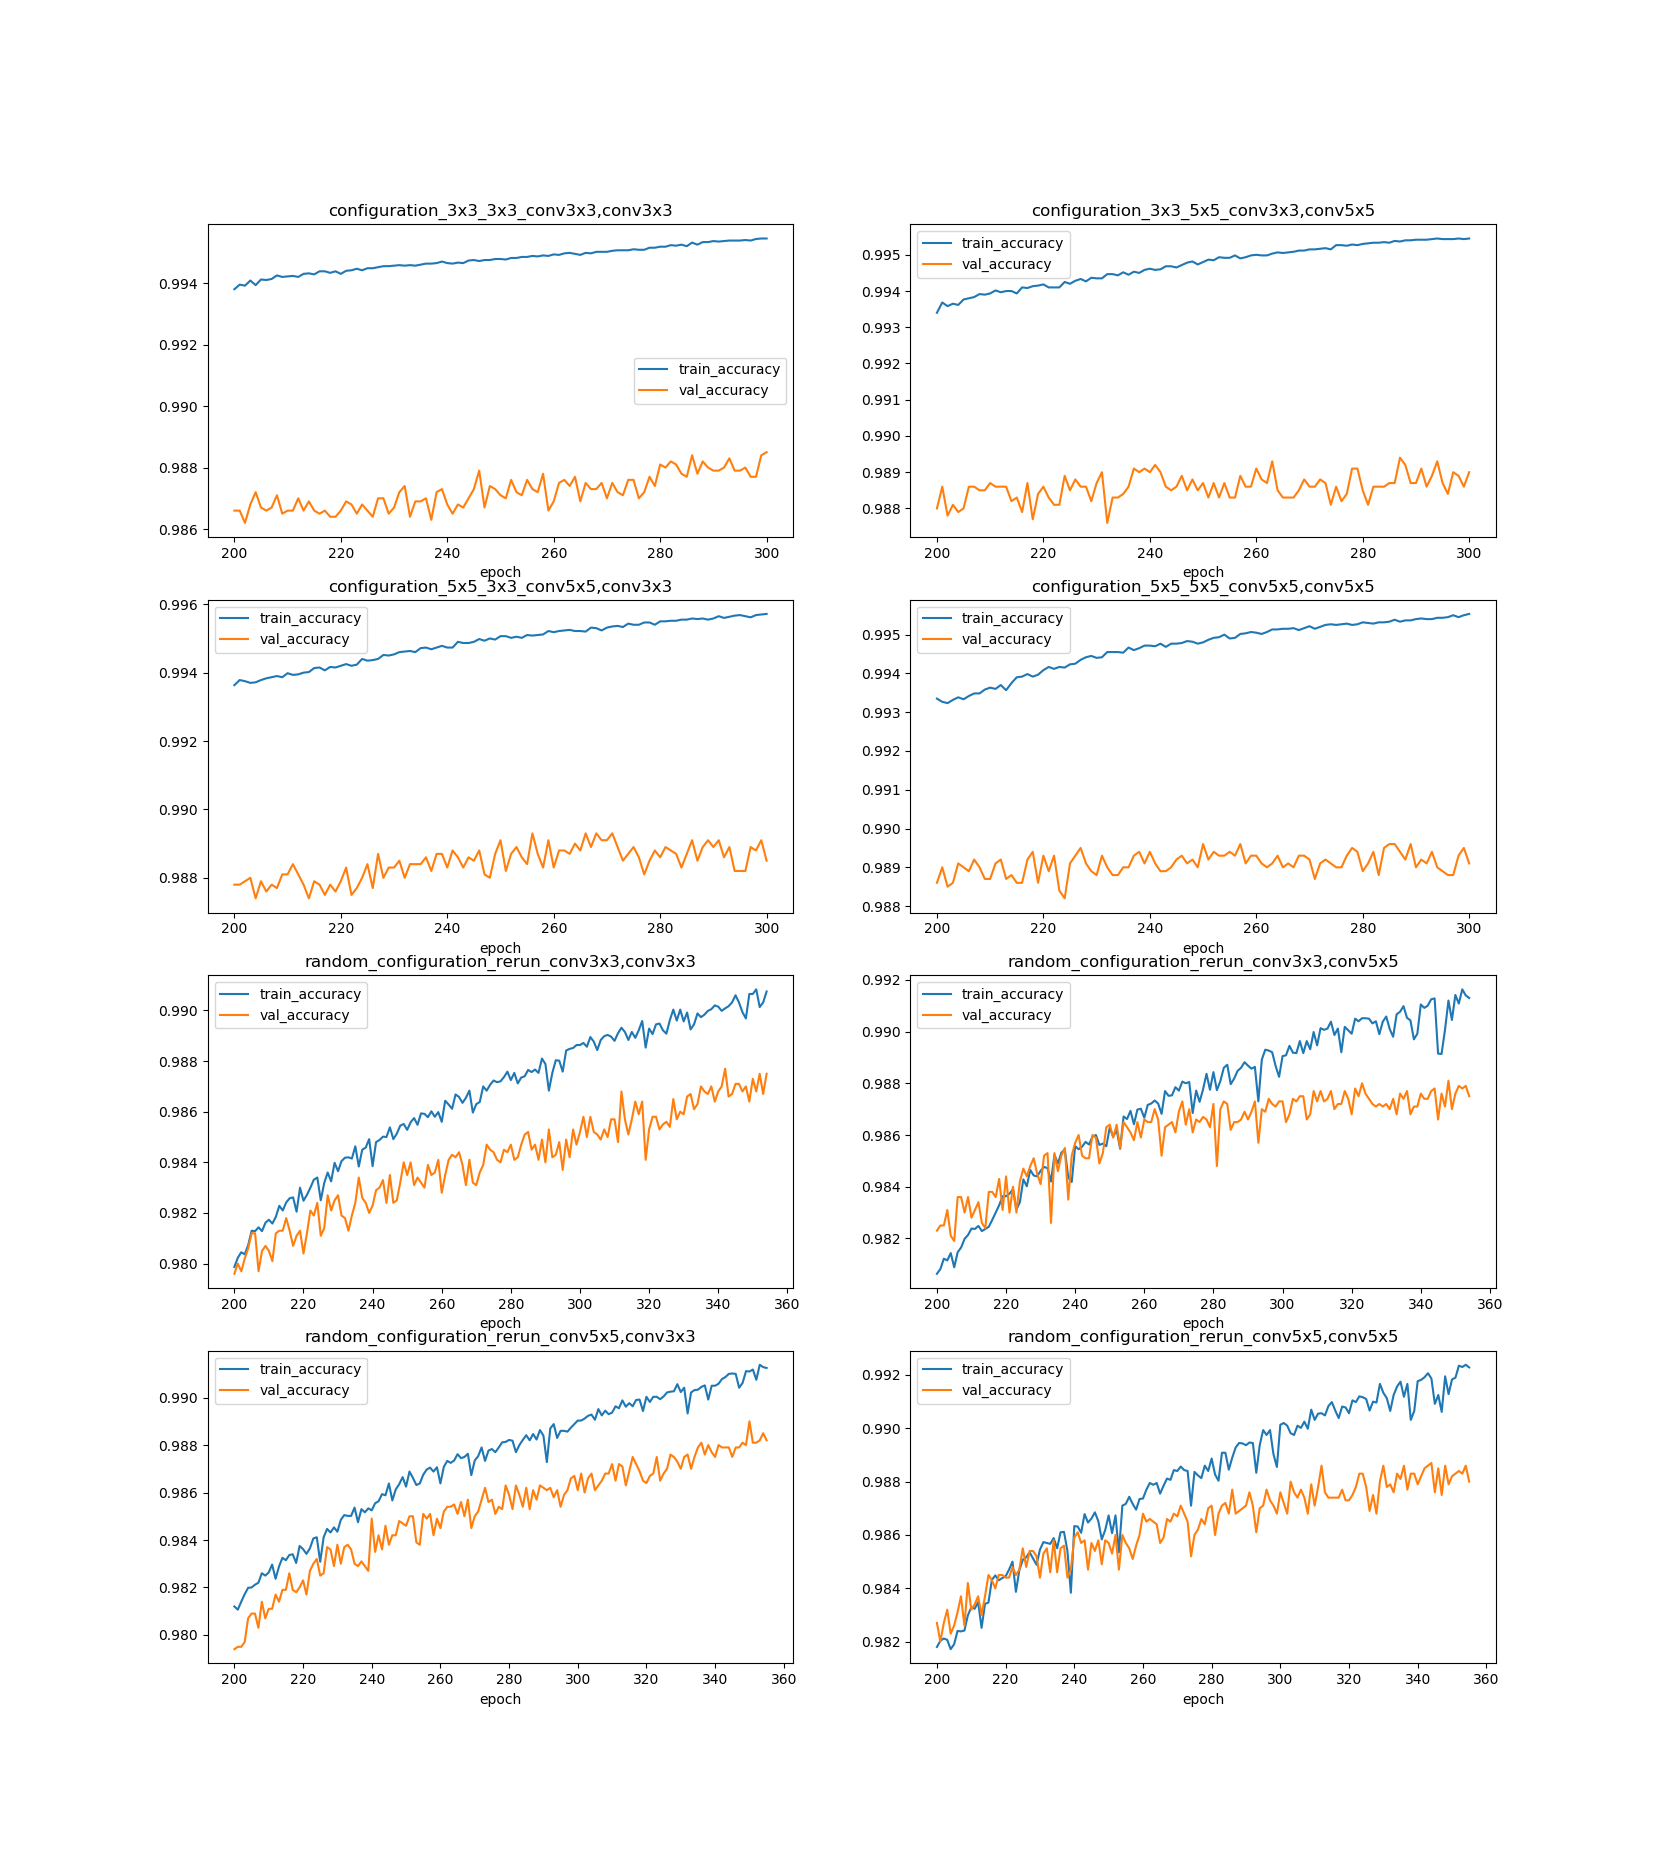

In [9]:
plot_training_curves(results, from_epoch=200)